# CONSTRUCTION OF FX VOL SURFACE

In this notebook I show how you can calibrate to the FX Vol Surface to 25Delta

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from financepy.finutils import *
from financepy.products.fx import *
from financepy.market.curves import *
from financepy.market.volatility import *

## Load the Volatility Market Quotes

In [19]:
valueDate = FinDate(10, 4, 2020)

In [20]:
forName = "EUR"
domName = "USD"
forCCRate = 0.03460  # EUR
domCCRate = 0.02940  # USD

We need to set up the option details - what you would find in the Term Sheet.

In [21]:
domDiscountCurve = FinDiscountCurveFlat(valueDate, domCCRate)
forDiscountCurve = FinDiscountCurveFlat(valueDate, forCCRate)

In [22]:
currencyPair = forName + domName
spotFXRate = 1.3465        

In [30]:
tenors = ['1Y']
atmVols = [18.250]
ms25DeltaVols = [0.95]
rr25DeltaVols = [-0.60]

In [31]:
notionalCurrency = forName
atmMethod = FinFXATMMethod.FWD_DELTA_NEUTRAL
deltaMethod = FinFXDeltaMethod.SPOT_DELTA
volFunctionType = FinVolFunctionTypes.CLARK

In [32]:
fxVolSurface = FinFXVolSurface(valueDate,
                               spotFXRate,
                               currencyPair,
                               notionalCurrency,
                               domDiscountCurve,
                               forDiscountCurve,
                               tenors,
                               atmVols,
                               ms25DeltaVols,
                               rr25DeltaVols,
                               atmMethod,
                               deltaMethod, 
                               volFunctionType)

xinit: 0 [-1.701005105959591, 0.05, 0.8]


In [33]:
fxVolSurface

OBJECT TYPE: FinFXVolSurface
VALUE DATE: 10-APR-2020
FX RATE: 1.3465
CCY PAIR: EURUSD
NOTIONAL CCY: EUR
NUM TENORS: 1
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
VOL FUNCTION: FinVolFunctionTypes.CLARK

TENOR: 1Y
EXPIRY DATE: 10-APR-2021
TIME (YRS): 1.0
FWD FX: 1.339530242682178
ATM VOLS: 18.25
MS VOLS: 0.95
RR VOLS: -0.6
ATM Strike: 1.3620243862979695
ATM Delta: 0.0
K_ATM: 1.3620243862979695
MS 25D Call Strike: 1.5449541300994312
MS 25D Put Strike: 1.20503396591047
NEW 25D CALL STRIKE: 1.5410389352425526
NEW 25D PUT STRIKE: 1.2034112944355422
PARAMS: [-1.69812439  0.1086131   0.80396459]

We now create the option object

In [34]:
fxVolSurface.checkCalibration(True)


VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000 %
IN MKT STRANGLE 25D VOL:  0.950000 %
IN RSK REVERSAL 25D VOL: -0.600000 %
T_(YEARS):  1.0
CNT_CPD_RD: 2.934146 %
CNT_CPD_RF: 3.453111 %
FWD_RATE:   1.339530
VOL FUNCTION FinVolFunctionTypes.CLARK
VOL_PARAMETERS: [-1.69812439  0.1086131   0.80396459]
OUT_K_ATM:   1.362024
OUT_ATM_VOL: 18.250000 %
CALL_DELTA:  0.483029  PUT_DELTA: -0.483029  NET_DELTA:  0.000000
MKT STRANGLE VOL IN:  0.950000 %
K_25D_C_MS:  1.544954  ATM + MSVOL: 19.200000 %   DELTA:  0.250000
K_25D_P_MS:  1.205034  ATM + MSVOL: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035509  PUT_VALUE:  0.043124  MS_VALUE:  0.078632
K_25D_C_MS:  1.544954  SURFACE_VOL: 18.923586 %   DELTA:  0.246190
K_25D_P_MS:  1.205034  SURFACE_VOL: 19.474749 %   DELTA: -0.252005
CALL_VALUE:  0.034350  PUT_VALUE:  0.044282  MS_SKEW_VALUE:  0.078632
K_25D_C: 1

In [8]:
print(callOption)

OBJECT TYPE: FinEquityVanillaOption
EXPIRY DATE: 01-JUL-2015
STRIKE PRICE: 100.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [15]:
putOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)

## Valuation

In [ ]:
tenors = ['1M', '2M', '3M', '6M', '1Y', '2Y']
atmVols = [21.00, 21.00, 20.750, 19.400, 18.250, 17.677]
ms25DeltaVols = [0.65, 0.75, 0.85, 0.90, 0.95, 0.85]
rr25DeltaVols = [-0.20, -0.25, -0.30, -0.50, -0.60, -0.562]

To do a valuation we need to specify the date and set the market inputs

In [10]:
valueDate = FinDate(1, 1, 2015)
stockPrice = 90.0
dividendYield = 0.0

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

In [11]:
interestRate = 0.02
discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [12]:
volatility = 0.20
model = FinModelBlackScholes(volatility)

The valuation is as follows and the output is in a dictionary

In [13]:
callValue = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print("Call Option Value: %12.5f" %callValue)

Call Option Value:      1.96752


In [16]:
putValue = putOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print("Put Option Value: %12.5f" %putValue)

Put Option Value:     10.99033


### Spot Price Dependency

We can examine how the option value depends on the spot price

In [18]:
stockPrices = np.linspace(60,140,100)
values = callOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

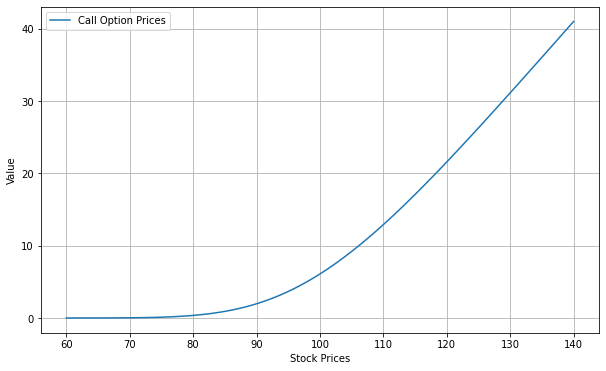

In [20]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices,values, label="Call Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

We can see how the value depends on volatility

In [27]:
volatilities = np.linspace(0.01,10,100)
models = FinModelBlackScholes(volatilities)
values = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, models)

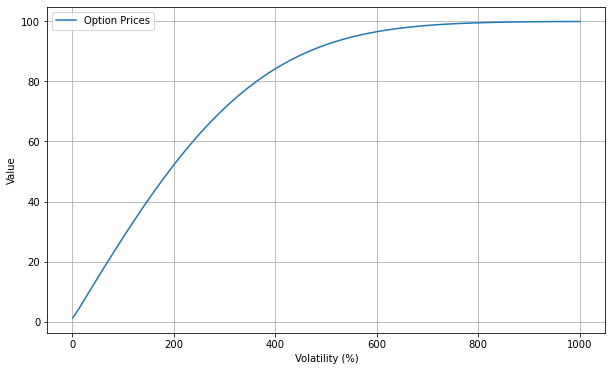

In [28]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values, label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Strike Price Dependency

Also strikes. 

In [29]:
strikePrices = np.linspace(70,130,50)

But as these are part of the option description - so we need to first vectorise those.

In [30]:
callOptions = FinEquityVanillaOption(expiryDate, strikePrices, payoffType)

Look, we have an array of callOptions with different strikes

In [31]:
callOptions._strikePrice

array([ 70.        ,  71.2244898 ,  72.44897959,  73.67346939,
        74.89795918,  76.12244898,  77.34693878,  78.57142857,
        79.79591837,  81.02040816,  82.24489796,  83.46938776,
        84.69387755,  85.91836735,  87.14285714,  88.36734694,
        89.59183673,  90.81632653,  92.04081633,  93.26530612,
        94.48979592,  95.71428571,  96.93877551,  98.16326531,
        99.3877551 , 100.6122449 , 101.83673469, 103.06122449,
       104.28571429, 105.51020408, 106.73469388, 107.95918367,
       109.18367347, 110.40816327, 111.63265306, 112.85714286,
       114.08163265, 115.30612245, 116.53061224, 117.75510204,
       118.97959184, 120.20408163, 121.42857143, 122.65306122,
       123.87755102, 125.10204082, 126.32653061, 127.55102041,
       128.7755102 , 130.        ])

Then we can get back a vector of values

In [32]:
callValues = callOptions.value(valueDate, stockPrice, discountCurve, dividendYield, model)

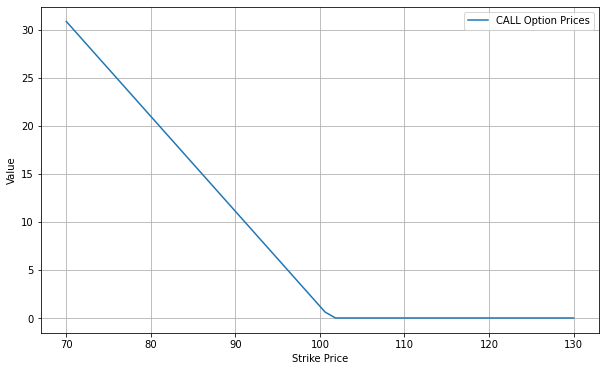

In [33]:
plt.figure(figsize=(10,6))
plt.plot(strikePrices, callValues, label="CALL Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Let's do put options too 

In [34]:
putOptions = FinEquityVanillaOption(expiryDate, strikePrices, FinOptionTypes.EUROPEAN_PUT)

In [35]:
putValues = putOptions.value(valueDate, stockPrice, discountCurve, dividendYield, model)

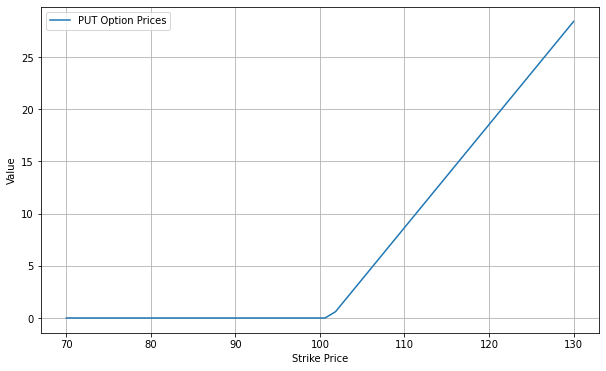

In [36]:
plt.figure(figsize=(10,6))
plt.plot(strikePrices, putValues, label="PUT Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Risk Sensitivities

In [25]:
callDeltas = callOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

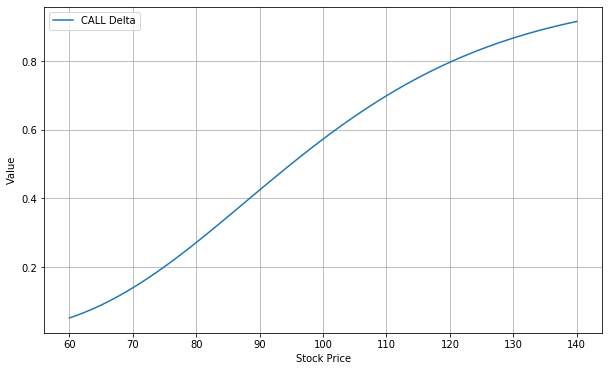

In [26]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callDeltas, label="CALL Delta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [29]:
callGammas = callOption.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

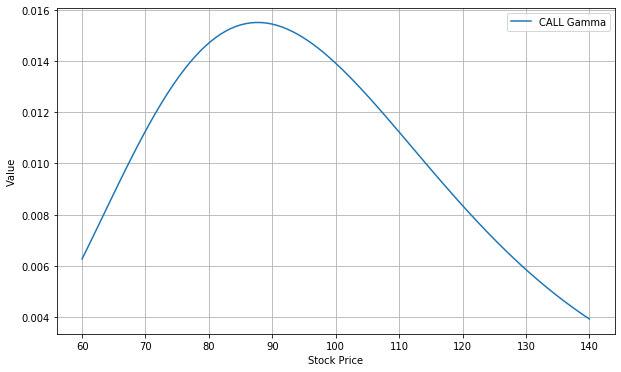

In [30]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callGammas, label="CALL Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [31]:
callVegas = callOption.vega(valueDate, stockPrices, discountCurve, dividendYield, model)

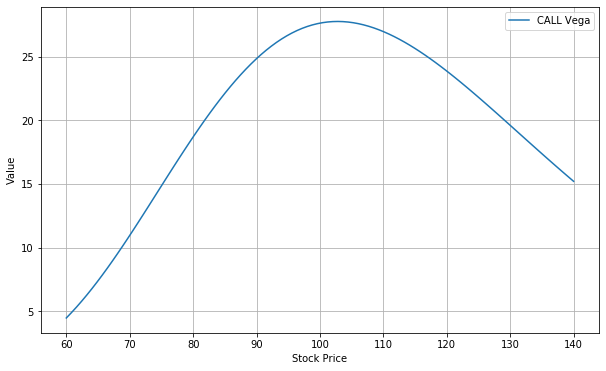

In [32]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callVegas, label="CALL Vega")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [33]:
callThetas = callOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

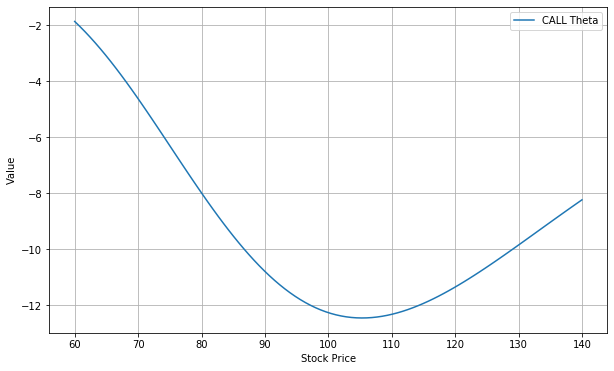

In [34]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callThetas, label="CALL Theta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 